## The pusrpose of this model building is to identify those prosepective leads who will most likely enroll for courses if marketing efforts are targetted towards them.

### Step 1: Reading and understanding the data

In [1]:
#Importing required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np

In [2]:
#Reading the data
Lead_score=pd.read_csv('Leads.csv')
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Looking at the dimensions of the raw data
Lead_score.shape

(9240, 37)

In [4]:
#checking the numeric data
Lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#checking the data type of the columns
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Cleaning and preparing the data

#### As seen above, there are many null values in the various columns. Those need to be taken care of. 
#### Also, there are many categorical variables (both 2-level and multilevel). Dummy variables need to be created for them.

#### Starting with dealing with null values

In [6]:
#As mentioned in the problem statement, there are many columns where 'select' is there. And this can be treated as null value.
#The term 'select' may be appearing because, the raw data might have been collected as survey. And, 'select' could be the 
#default option. Respondents might have left it there if they couldn't think of an appropriate value for that column.

#finding and replacing 'select' with null
Lead_score.replace('Select',np.nan)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [7]:
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
Lead_score=Lead_score.replace('Select',np.nan)
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#checking the null values again (like for 'Lead Profile' and 'City')
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#So, after replacing 'Select' with null, many columns' non-null values have reduced significantly. Let's check null value %age

100*Lead_score.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
#So, there are 13 columns who have significant amount of null values (approx 30% or more). I will drop them.
Lead_score=Lead_score.drop(['Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

In [13]:
#Also, there are 4 columns where very small amount of null values are there. I will delete those rows.
Lead_score = Lead_score[~pd.isna(Lead_score['Lead Source'])]
Lead_score = Lead_score[~pd.isna(Lead_score['TotalVisits'])]
Lead_score = Lead_score[~pd.isna(Lead_score['Page Views Per Visit'])]
Lead_score = Lead_score[~pd.isna(Lead_score['Last Activity'])]

In [14]:
#Again checking the null values
100*Lead_score.isnull().mean()

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [15]:
Lead_score.shape

(9074, 24)

#### Now that null values are dealt with, next step is to deal with categorical variables

In [16]:
Lead_score.head(15)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,No,No,No,No,No,No,No,No,Email Opened


In [18]:
#I want to see all columns
pd.set_option('display.max_columns', None)

In [19]:
Lead_score.head(15)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,No,No,No,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,No,No,No,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


In [20]:
#converting Yes/No variables to 1/0
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function
Lead_score[varlist] = Lead_score[varlist].apply(binary_map)

In [21]:
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [22]:
#All Yes/No categorical values are now in 1/0 format
#Now, dummy variables will be created for multi-level categorical variables. The first one will be dropped.
dummy1 = pd.get_dummies(Lead_score[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Lead_score = pd.concat([Lead_score, dummy1], axis=1)

In [23]:
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
#Dropping the original variables for which dummy variables are created
Lead_score = Lead_score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], 1)

In [25]:
Lead_score.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
Lead_score.shape

(9074, 74)

In [27]:
#There are 74 columns!!
#I want to check the info again
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         9074 non-null   object 
 1   Lead Number                                         9074 non-null   int64  
 2   Do Not Email                                        9074 non-null   int64  
 3   Do Not Call                                         9074 non-null   int64  
 4   Converted                                           9074 non-null   int64  
 5   TotalVisits                                         9074 non-null   float64
 6   Total Time Spent on Website                         9074 non-null   int64  
 7   Page Views Per Visit                                9074 non-null   float64
 8   Search                                              9074 non-null   int64  
 9

In [30]:
#From null values perspective and datatype perspective, this dataframe looks fine now.
#I want to check if 'Lead number' is a unique identifier. If yes, I will drop 'Prospect ID' as it has long character values.

print("Is Unique: ", Lead_score['Lead Number'].is_unique)

Is Unique:  True


In [31]:
#Given that 'Lead Number' is unique, I will drop 'Prospect ID'.
Lead_score = Lead_score.drop(['Prospect ID'], 1)

In [32]:
Lead_score.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Step 3: Train-test split and standardizing numeric variables

#### Performing the train-test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# allocating independent variables to X
X = Lead_score.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
# allocating target (dependent) variable to y
y = Lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Performing standardization for numeric (continuous) variables

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
#Checking class imbalance in the actual dataset
100*Lead_score['Converted'].mean()

37.85541106458012

In [41]:
#Although this is not actual 50-50 balance but it's not that imbalanced as well. 38%-62% is a good class split for target variable.

In [42]:
#I won't perform correlation check using heatmap as there are many variables and it will become cumbersome.
#I will directly perform feature elimination using RFE.

### Step 4: Building the model

In [43]:
import statsmodels.api as sm

In [44]:
# Running the logistic regression model with all variables, just to check
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 28 Nov 2023   Deviance:                   1.5096e+05
Time:                        12:37:28   Pearson chi2:                 7.38e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               6.371e+15    9.1e+07      7e+07      0.000    6.37e+15    6.37e+15
Do Not Email                                       -6.064e+14   4.42e+06  -1.37e+08      0.000   -6.06e+14   -6.06e+14
Do Not Call                                          7.76e+15   4.76e+07   1.63e+08      0.000    7.76e+15    7.76e+15
TotalVisits                                         1.005e+14   9.97e+05   1.01e+08      0.000    1.01e+14    1.01e+14
Total Time Spent on Website                         6.701e+14   9.71e+05    6.9e+08      0.000     6.7e+14     6.7e+14
Page Views Per Visit                                9.434e+12   1.25e+06   7.55e+06      0.000    9.43e+12    9.43e+12
Search                                              8.049e+14   2.38e+07   3.38e+07      0.000    8.05e+14    8.05e+14
Magazine                                             133.5144   9.64e-07   1.38e+08      0.000     133.514     133.514
Newspaper Article                                   1.197e+15   6.73e+07   1.78e+07      0.000     1.2e+15     1.2e+15
X Education Forums                                 -1.333e+16   1.12e+08  -1.19e+08      0.000   -1.33e+16   -1.33e+16
Newspaper                                          -7.528e+15   6.72e+07  -1.12e+08      0.000   -7.53e+15   -7.53e+15
Digital Advertisement                               5.484e+14   4.76e+07   1.15e+07      0.000    5.48e+14    5.48e+14
Through Recommendations                             1.118e+15   3.56e+07   3.14e+07      0.000    1.12e+15    1.12e+15
Receive More Updates About Our Courses               104.4289   7.26e-07   1.44e+08      0.000     104.429     104.429
Update me on Supply Chain Content                   -111.5131   7.12e-07  -1.57e+08      0.000    -111.513    -111.513
Get updates on DM Content                             37.9229      9e-07   4.21e+07      0.000      37.923      37.923
I agree to pay the amount through cheque               9.4847   6.76e-07    1.4e+07      0.000       9.485       9.485
A free copy of Mastering The Interview              1.168e+14   2.61e+06   4.47e+07      0.000    1.17e+14    1.17e+14
Lead Origin_Landing Page Submission                -1.469e+14   2.66e+06  -5.53e+07      0.000   -1.47e+14   -1.47e+14
Lead Origin_Lead Add Form                           6.981e+14   4.76e+07   1.47e+07      0.000    6.98e+14    6.98e+14
Lead Origin_Lead Import                             4.205e+15   6.86e+07   6.13e+07      0.000    4.21e+15    4.21e+15
Lead Source_Direct Traffic                         -3.108e+15   6.15e+07  -5.06e+07      0.000   -3.11e+15   -3.11e+15
Lead Source_Facebook                               -7.005e+15    9.1e+07   -7.7e+07      0.000      -7e+15  

In [46]:
#It's a big model to interpret. I will perform feature elimination using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [47]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False, False])

In [48]:
#Checking the features which got selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 4),
 ('Magazine', False, 4),
 ('Newspaper Article', False, 3),
 ('X Education Forums', False, 3),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 4),
 ('Update me on Supply Chain Content', False, 4),
 ('Get updates on DM Content', False, 4),
 ('I agree to pay the amount through cheque', False, 4),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('

In [49]:
#Storing the selected columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
      

In [50]:
#Again assessing the model with statsmodel and reduced number of features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.4
Date:                Tue, 28 Nov 2023   Deviance:                       5536.8
Time:                        12:50:53   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3695
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.1964      1.047      0.188      0.851      -1.855       2.248
Do Not Email                                      -1.5366      0.212     -7.249      0.000      -1.952      -1.121
Do Not Call                                       21.8946   3.38e+04      0.001      0.999   -6.62e+04    6.62e+04
Total Time Spent on Website                        1.1491      0.040     28.890      0.000       1.071       1.227
Newspaper                                        -24.1319   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Through Recommendations                            0.8922      1.115      0.800      0.424      -1.294       3.078
Lead Origin_Lead Add Form                          1.9578      1.096      1.786      0.074      -0.190       4.106
Lead Origin_Lead Import                            1.5463      0.848      1.823      0.068      -0.116       3.209
Lead Source_Direct Traffic                        -0.1915      0.734     -0.261      0.794      -1.631       1.248
Lead Source_Google                                 0.1661      0.734      0.226      0.821      -1.272       1.604
Lead Source_Olark Chat                             1.1725      0.736      1.594      0.111      -0.269       2.614
Lead Source_Organic Search                        -0.0163      0.737     -0.022      0.982      -1.461       1.429
Lead Source_Reference                              2.2674      0.952      2.382      0.017       0.402       4.133
Lead Source_Referral Sites                        -0.1378      0.794     -0.174      0.862      -1.694       1.418
Lead Source_Social Media                           2.1541      1.613      1.336      0.182      -1.007       5.315
Lead Source_Welingak Website                       3.8323      1.177      3.256      0.001       1.526       6.139
Lead Source_blog                                 -21.9304   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                               -21.3333   2.08e+04     -0.001      0.999   -4.09e+04    4.08e+04
Last Activity_Converted to Lead                   -1.1040      0.223     -4.952      0.000      -1.541      -0.667
Last Activity_Email Bounced                       -1.5203      0.627     -2.426      0.015      -2.749      -0.292
Last Activity_Email Link Clicked                  -0.4899      0.366     -1.337      0.181      -1.208       0.228
Last Activity_Email Received                      21.8559   3.39e+04      0.001      0.999   -6.64e+04    6.64e+04
Last Activity_Form Submitted on Website           -0.5781      0.337     -1.716      0.086      -1.238       0.082
Last Activity_Had a Phone Conversation             1.4970      1.141      1.312      0.190   

In [51]:
#This model has many features which are coming as insignificant (with p-value much higher than 0.05)
#I will, one by one, start dropping the features with very high p-value
#and then will check VIF to see if any further features need to be dropped due to multicollinearity

#dropping 'Lead Source_blog' and running the model again
col = col.drop('Lead Source_blog', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.8
Date:                Tue, 28 Nov 2023   Deviance:                       5537.6
Time:                        13:56:32   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3694
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0286      1.035      0.028      0.978      -1.999       2.056
Do Not Email                                      -1.5360      0.212     -7.246      0.000      -1.951      -1.121
Do Not Call                                       21.8946   3.38e+04      0.001      0.999   -6.62e+04    6.62e+04
Total Time Spent on Website                        1.1489      0.040     28.886      0.000       1.071       1.227
Newspaper                                        -24.1309   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Through Recommendations                            0.8918      1.115      0.800      0.424      -1.294       3.077
Lead Origin_Lead Add Form                          2.0981      1.095      1.915      0.055      -0.049       4.245
Lead Origin_Lead Import                            1.7167      0.832      2.064      0.039       0.086       3.347
Lead Source_Direct Traffic                        -0.0212      0.715     -0.030      0.976      -1.423       1.381
Lead Source_Google                                 0.3364      0.715      0.471      0.638      -1.065       1.737
Lead Source_Olark Chat                             1.3423      0.717      1.872      0.061      -0.063       2.748
Lead Source_Organic Search                         0.1539      0.718      0.214      0.830      -1.254       1.562
Lead Source_Reference                              2.2971      0.954      2.408      0.016       0.428       4.167
Lead Source_Referral Sites                         0.0323      0.776      0.042      0.967      -1.489       1.554
Lead Source_Social Media                           2.3236      1.605      1.448      0.148      -0.821       5.469
Lead Source_Welingak Website                       3.8620      1.179      3.277      0.001       1.552       6.172
Lead Source_google                               -21.1636   2.08e+04     -0.001      0.999   -4.09e+04    4.08e+04
Last Activity_Converted to Lead                   -1.1040      0.223     -4.952      0.000      -1.541      -0.667
Last Activity_Email Bounced                       -1.5207      0.627     -2.426      0.015      -2.749      -0.292
Last Activity_Email Link Clicked                  -0.4899      0.366     -1.337      0.181      -1.208       0.228
Last Activity_Email Received                      21.8550   3.39e+04      0.001      0.999   -6.64e+04    6.64e+04
Last Activity_Form Submitted on Website           -0.5782      0.337     -1.716      0.086      -1.238       0.082
Last Activity_Had a Phone Conversation             1.4969      1.141      1.312      0.190      -0.739       3.733
Last Activity_Olark Chat Conversation             -1.5024      0.193     -7.772      0.000   

In [52]:
#dropping 'Newspaper' and running the model again
col = col.drop('Newspaper', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.5
Date:                Tue, 28 Nov 2023   Deviance:                       5541.1
Time:                        13:58:22   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3691
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0296      1.034      0.029      0.977      -1.998       2.057
Do Not Email                                      -1.5351      0.212     -7.244      0.000      -1.950      -1.120
Do Not Call                                       21.8955   3.38e+04      0.001      0.999   -6.62e+04    6.62e+04
Total Time Spent on Website                        1.1463      0.040     28.858      0.000       1.068       1.224
Through Recommendations                            0.8946      1.115      0.802      0.422      -1.290       3.080
Lead Origin_Lead Add Form                          2.0968      1.095      1.915      0.056      -0.050       4.243
Lead Origin_Lead Import                            1.7154      0.832      2.062      0.039       0.085       3.346
Lead Source_Direct Traffic                        -0.0235      0.715     -0.033      0.974      -1.425       1.379
Lead Source_Google                                 0.3374      0.715      0.472      0.637      -1.063       1.738
Lead Source_Olark Chat                             1.3404      0.717      1.870      0.062      -0.065       2.746
Lead Source_Organic Search                         0.1548      0.718      0.216      0.829      -1.253       1.563
Lead Source_Reference                              2.2962      0.954      2.408      0.016       0.427       4.165
Lead Source_Referral Sites                         0.0331      0.776      0.043      0.966      -1.488       1.555
Lead Source_Social Media                           2.3229      1.604      1.448      0.148      -0.821       5.467
Lead Source_Welingak Website                       3.8607      1.178      3.276      0.001       1.551       6.170
Lead Source_google                               -21.1631   2.09e+04     -0.001      0.999   -4.09e+04    4.08e+04
Last Activity_Converted to Lead                   -1.1028      0.223     -4.949      0.000      -1.539      -0.666
Last Activity_Email Bounced                       -1.5204      0.627     -2.426      0.015      -2.749      -0.292
Last Activity_Email Link Clicked                  -0.4903      0.366     -1.339      0.181      -1.208       0.228
Last Activity_Email Received                      21.8557   3.39e+04      0.001      0.999   -6.64e+04    6.64e+04
Last Activity_Form Submitted on Website           -0.5773      0.337     -1.715      0.086      -1.237       0.083
Last Activity_Had a Phone Conversation             1.4957      1.140      1.312      0.190      -0.739       3.731
Last Activity_Olark Chat Conversation             -1.5030      0.193     -7.777      0.000      -1.882      -1.124
Last Activity_Page Visited on Website             -0.5092      0.215     -2.371      0.018   

In [53]:
#dropping 'Do Not Call' and running the model again
col = col.drop('Do Not Call', 1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.4
Date:                Tue, 28 Nov 2023   Deviance:                       5542.7
Time:                        14:00:04   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3689
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0307      1.035      0.030      0.976      -1.997       2.059
Do Not Email                                      -1.5364      0.212     -7.246      0.000      -1.952      -1.121
Total Time Spent on Website                        1.1468      0.040     28.876      0.000       1.069       1.225
Through Recommendations                            0.8947      1.115      0.802      0.422      -1.291       3.080
Lead Origin_Lead Add Form                          2.0972      1.095      1.915      0.055      -0.049       4.244
Lead Origin_Lead Import                            1.7157      0.832      2.063      0.039       0.085       3.346
Lead Source_Direct Traffic                        -0.0238      0.715     -0.033      0.973      -1.426       1.378
Lead Source_Google                                 0.3377      0.715      0.472      0.637      -1.063       1.739
Lead Source_Olark Chat                             1.3392      0.717      1.868      0.062      -0.066       2.744
Lead Source_Organic Search                         0.1543      0.718      0.215      0.830      -1.254       1.562
Lead Source_Reference                              2.3139      0.954      2.426      0.015       0.445       4.183
Lead Source_Referral Sites                         0.0319      0.776      0.041      0.967      -1.490       1.553
Lead Source_Social Media                           2.3170      1.605      1.444      0.149      -0.829       5.463
Lead Source_Welingak Website                       3.8607      1.178      3.276      0.001       1.551       6.170
Lead Source_google                               -21.1640   2.08e+04     -0.001      0.999   -4.09e+04    4.08e+04
Last Activity_Converted to Lead                   -1.1042      0.223     -4.956      0.000      -1.541      -0.668
Last Activity_Email Bounced                       -1.5203      0.627     -2.426      0.015      -2.749      -0.292
Last Activity_Email Link Clicked                  -0.4929      0.367     -1.345      0.179      -1.211       0.226
Last Activity_Email Received                      21.8537   3.39e+04      0.001      0.999   -6.63e+04    6.64e+04
Last Activity_Form Submitted on Website           -0.5792      0.337     -1.720      0.085      -1.239       0.081
Last Activity_Had a Phone Conversation             1.4949      1.140      1.311      0.190      -0.740       3.730
Last Activity_Olark Chat Conversation             -1.4923      0.192     -7.771      0.000      -1.869      -1.116
Last Activity_Page Visited on Website             -0.5107      0.215     -2.378      0.017      -0.932      -0.090
Last Activity_Unsubscribed                         0.1903      0.780      0.244      0.807   

In [54]:
#dropping 'Lead Source_google' and running the model again
col = col.drop('Lead Source_google', 1)
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.2
Date:                Tue, 28 Nov 2023   Deviance:                       5544.5
Time:                        14:01:20   Pearson chi2:                 6.53e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3687
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3207      1.015     -0.316      0.752      -2.310       1.669
Do Not Email                                      -1.5352      0.212     -7.241      0.000      -1.951      -1.120
Total Time Spent on Website                        1.1461      0.040     28.866      0.000       1.068       1.224
Through Recommendations                            0.8964      1.115      0.804      0.421      -1.289       3.082
Lead Origin_Lead Add Form                          2.3958      1.099      2.181      0.029       0.243       4.549
Lead Origin_Lead Import                            2.0694      0.806      2.567      0.010       0.490       3.649
Lead Source_Direct Traffic                         0.3308      0.685      0.483      0.629      -1.011       1.673
Lead Source_Google                                 0.6924      0.684      1.012      0.311      -0.648       2.033
Lead Source_Olark Chat                             1.6923      0.687      2.463      0.014       0.346       3.039
Lead Source_Organic Search                         0.5089      0.688      0.740      0.459      -0.839       1.857
Lead Source_Reference                              2.3693      0.960      2.469      0.014       0.488       4.250
Lead Source_Referral Sites                         0.3865      0.748      0.517      0.605      -1.080       1.853
Lead Source_Social Media                           2.6752      1.591      1.681      0.093      -0.443       5.794
Lead Source_Welingak Website                       3.9159      1.183      3.310      0.001       1.597       6.235
Last Activity_Converted to Lead                   -1.1014      0.223     -4.944      0.000      -1.538      -0.665
Last Activity_Email Bounced                       -1.5184      0.627     -2.423      0.015      -2.747      -0.290
Last Activity_Email Link Clicked                  -0.4902      0.367     -1.337      0.181      -1.209       0.228
Last Activity_Email Received                      19.8544   1.25e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Activity_Form Submitted on Website           -0.5765      0.337     -1.712      0.087      -1.237       0.083
Last Activity_Had a Phone Conversation             1.4973      1.140      1.313      0.189      -0.737       3.732
Last Activity_Olark Chat Conversation             -1.4893      0.192     -7.756      0.000      -1.866      -1.113
Last Activity_Page Visited on Website             -0.5161      0.215     -2.406      0.016      -0.937      -0.096
Last Activity_Unsubscribed                         0.1966      0.780      0.252      0.801      -1.332       1.725
Last Notable Activity_Email Bounced                0.4791      1.081      0.443      0.658   

In [55]:
#dropping 'Last Activity_Email Received' and running the model again
col = col.drop('Last Activity_Email Received', 1)
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.0
Date:                Tue, 28 Nov 2023   Deviance:                       5546.1
Time:                        14:02:32   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1750      0.996     -0.176      0.861      -2.127       1.777
Do Not Email                                      -1.5394      0.212     -7.256      0.000      -1.955      -1.124
Total Time Spent on Website                        1.1467      0.040     28.878      0.000       1.069       1.225
Through Recommendations                            0.8967      1.115      0.804      0.421      -1.289       3.083
Lead Origin_Lead Add Form                          2.3969      1.098      2.182      0.029       0.244       4.550
Lead Origin_Lead Import                            2.0708      0.806      2.569      0.010       0.491       3.651
Lead Source_Direct Traffic                         0.3318      0.685      0.485      0.628      -1.010       1.674
Lead Source_Google                                 0.6953      0.684      1.017      0.309      -0.645       2.036
Lead Source_Olark Chat                             1.6936      0.687      2.465      0.014       0.347       3.040
Lead Source_Organic Search                         0.5099      0.688      0.741      0.459      -0.838       1.858
Lead Source_Reference                              2.3694      0.960      2.469      0.014       0.489       4.250
Lead Source_Referral Sites                         0.3870      0.748      0.517      0.605      -1.079       1.853
Lead Source_Social Media                           2.6768      1.591      1.682      0.093      -0.442       5.795
Lead Source_Welingak Website                       3.9166      1.183      3.310      0.001       1.598       6.235
Last Activity_Converted to Lead                   -1.1054      0.223     -4.963      0.000      -1.542      -0.669
Last Activity_Email Bounced                       -1.5181      0.627     -2.422      0.015      -2.746      -0.290
Last Activity_Email Link Clicked                  -0.4940      0.367     -1.348      0.178      -1.212       0.224
Last Activity_Form Submitted on Website           -0.5839      0.337     -1.734      0.083      -1.244       0.076
Last Activity_Had a Phone Conversation             1.4946      1.140      1.311      0.190      -0.741       3.730
Last Activity_Olark Chat Conversation             -1.4926      0.192     -7.775      0.000      -1.869      -1.116
Last Activity_Page Visited on Website             -0.5199      0.215     -2.424      0.015      -0.940      -0.099
Last Activity_Unsubscribed                         0.0737      0.768      0.096      0.924      -1.432       1.579
Last Notable Activity_Email Bounced                0.3355      1.063      0.316      0.752      -1.748       2.419
Last Notable Activity_Email Link Clicked          -1.3411      0.848     -1.581      0.114   

In [56]:
#dropping 'Last Notable Activity_SMS Sent' and running the model again
col = col.drop('Last Notable Activity_SMS Sent', 1)
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.0
Date:                Tue, 28 Nov 2023   Deviance:                       5546.1
Time:                        14:04:17   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1676      0.684     -0.245      0.806      -1.508       1.173
Do Not Email                                      -1.5395      0.212     -7.274      0.000      -1.954      -1.125
Total Time Spent on Website                        1.1467      0.040     28.880      0.000       1.069       1.225
Through Recommendations                            0.8967      1.115      0.804      0.421      -1.289       3.083
Lead Origin_Lead Add Form                          2.3970      1.098      2.182      0.029       0.244       4.550
Lead Origin_Lead Import                            2.0709      0.806      2.569      0.010       0.491       3.651
Lead Source_Direct Traffic                         0.3318      0.685      0.485      0.628      -1.010       1.674
Lead Source_Google                                 0.6953      0.684      1.017      0.309      -0.645       2.036
Lead Source_Olark Chat                             1.6937      0.687      2.465      0.014       0.347       3.040
Lead Source_Organic Search                         0.5100      0.688      0.741      0.458      -0.838       1.858
Lead Source_Reference                              2.3694      0.960      2.469      0.014       0.489       4.250
Lead Source_Referral Sites                         0.3870      0.748      0.517      0.605      -1.079       1.853
Lead Source_Social Media                           2.6769      1.591      1.682      0.093      -0.442       5.796
Lead Source_Welingak Website                       3.9166      1.183      3.310      0.001       1.598       6.235
Last Activity_Converted to Lead                   -1.1055      0.223     -4.964      0.000      -1.542      -0.669
Last Activity_Email Bounced                       -1.5180      0.627     -2.422      0.015      -2.746      -0.290
Last Activity_Email Link Clicked                  -0.4940      0.367     -1.348      0.178      -1.212       0.224
Last Activity_Form Submitted on Website           -0.5841      0.336     -1.738      0.082      -1.243       0.075
Last Activity_Had a Phone Conversation             1.4946      1.140      1.311      0.190      -0.741       3.730
Last Activity_Olark Chat Conversation             -1.4927      0.192     -7.777      0.000      -1.869      -1.116
Last Activity_Page Visited on Website             -0.5199      0.214     -2.424      0.015      -0.940      -0.100
Last Activity_Unsubscribed                         0.0674      0.462      0.146      0.884      -0.839       0.974
Last Notable Activity_Email Bounced                0.3281      0.780      0.421      0.674      -1.201       1.857
Last Notable Activity_Email Link Clicked          -1.3485      0.442     -3.054      0.002   

In [57]:
#dropping 'Last Activity_Unsubscribed' and running the model again
col = col.drop('Last Activity_Unsubscribed', 1)
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.0
Date:                Tue, 28 Nov 2023   Deviance:                       5546.1
Time:                        14:05:45   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.1643      0.684     -0.240      0.810      -1.505       1.176
Do Not Email                                      -1.5272      0.194     -7.886      0.000      -1.907      -1.148
Total Time Spent on Website                        1.1467      0.040     28.884      0.000       1.069       1.225
Through Recommendations                            0.8974      1.115      0.805      0.421      -1.289       3.083
Lead Origin_Lead Add Form                          2.3945      1.098      2.180      0.029       0.242       4.547
Lead Origin_Lead Import                            2.0680      0.806      2.566      0.010       0.489       3.647
Lead Source_Direct Traffic                         0.3287      0.684      0.480      0.631      -1.013       1.670
Lead Source_Google                                 0.6924      0.684      1.013      0.311      -0.648       2.033
Lead Source_Olark Chat                             1.6910      0.687      2.462      0.014       0.345       3.037
Lead Source_Organic Search                         0.5072      0.688      0.737      0.461      -0.841       1.855
Lead Source_Reference                              2.3685      0.959      2.469      0.014       0.488       4.249
Lead Source_Referral Sites                         0.3854      0.748      0.515      0.606      -1.081       1.852
Lead Source_Social Media                           2.6746      1.591      1.681      0.093      -0.444       5.793
Lead Source_Welingak Website                       3.9139      1.183      3.309      0.001       1.596       6.232
Last Activity_Converted to Lead                   -1.1055      0.223     -4.964      0.000      -1.542      -0.669
Last Activity_Email Bounced                       -1.5289      0.622     -2.458      0.014      -2.748      -0.310
Last Activity_Email Link Clicked                  -0.4941      0.367     -1.348      0.178      -1.212       0.224
Last Activity_Form Submitted on Website           -0.5842      0.336     -1.739      0.082      -1.243       0.074
Last Activity_Had a Phone Conversation             1.4926      1.140      1.310      0.190      -0.741       3.726
Last Activity_Olark Chat Conversation             -1.4929      0.192     -7.779      0.000      -1.869      -1.117
Last Activity_Page Visited on Website             -0.5209      0.214     -2.431      0.015      -0.941      -0.101
Last Notable Activity_Email Bounced                0.3264      0.780      0.419      0.676      -1.202       1.855
Last Notable Activity_Email Link Clicked          -1.3488      0.442     -3.054      0.002      -2.214      -0.483
Last Notable Activity_Email Opened                -1.4027      0.086    -16.281      0.000   

In [58]:
#dropping 'Last Notable Activity_Had a Phone Conversation' and running the model again
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.1
Date:                Tue, 28 Nov 2023   Deviance:                       5546.1
Time:                        14:08:29   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.1636      0.684     -0.239      0.811      -1.504       1.177
Do Not Email                                     -1.5283      0.194     -7.894      0.000      -1.908      -1.149
Total Time Spent on Website                       1.1467      0.040     28.882      0.000       1.069       1.224
Through Recommendations                           0.8972      1.115      0.804      0.421      -1.289       3.083
Lead Origin_Lead Add Form                         2.3944      1.098      2.180      0.029       0.242       4.547
Lead Origin_Lead Import                           2.0682      0.806      2.566      0.010       0.489       3.648
Lead Source_Direct Traffic                        0.3288      0.684      0.480      0.631      -1.013       1.670
Lead Source_Google                                0.6927      0.684      1.013      0.311      -0.648       2.033
Lead Source_Olark Chat                            1.6909      0.687      2.461      0.014       0.345       3.037
Lead Source_Organic Search                        0.5062      0.688      0.736      0.462      -0.842       1.854
Lead Source_Reference                             2.3687      0.960      2.469      0.014       0.488       4.249
Lead Source_Referral Sites                        0.3841      0.748      0.513      0.608      -1.083       1.851
Lead Source_Social Media                          2.6745      1.591      1.681      0.093      -0.444       5.793
Lead Source_Welingak Website                      3.9143      1.183      3.309      0.001       1.596       6.233
Last Activity_Converted to Lead                  -1.1043      0.223     -4.960      0.000      -1.541      -0.668
Last Activity_Email Bounced                      -1.5266      0.622     -2.454      0.014      -2.746      -0.307
Last Activity_Email Link Clicked                 -0.4930      0.367     -1.345      0.179      -1.211       0.225
Last Activity_Form Submitted on Website          -0.5834      0.336     -1.736      0.083      -1.242       0.075
Last Activity_Had a Phone Conversation            1.6943      0.769      2.203      0.028       0.187       3.201
Last Activity_Olark Chat Conversation            -1.4918      0.192     -7.775      0.000      -1.868      -1.116
Last Activity_Page Visited on Website            -0.5197      0.214     -2.425      0.015      -0.940      -0.100
Last Notable Activity_Email Bounced               0.3245      0.780      0.416      0.677      -1.204       1.853
Last Notable Activity_Email Link Clicked         -1.3506      0.442     -3.059      0.002      -2.216      -0.485
Last Notable Activity_Email Opened               -1.4034      0.086    -16.300      0.000      -1.572      -1.235
Last 

In [59]:
#dropping 'Last Notable Activity_Email Bounced' and running the model again
col = col.drop('Last Notable Activity_Email Bounced', 1)
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.2
Date:                Tue, 28 Nov 2023   Deviance:                       5546.3
Time:                        14:09:36   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.1616      0.684     -0.236      0.813      -1.502       1.179
Do Not Email                                     -1.5271      0.193     -7.897      0.000      -1.906      -1.148
Total Time Spent on Website                       1.1468      0.040     28.887      0.000       1.069       1.225
Through Recommendations                           0.8974      1.115      0.805      0.421      -1.289       3.084
Lead Origin_Lead Add Form                         2.3949      1.099      2.180      0.029       0.242       4.548
Lead Origin_Lead Import                           2.0694      0.806      2.568      0.010       0.490       3.649
Lead Source_Direct Traffic                        0.3287      0.684      0.480      0.631      -1.013       1.670
Lead Source_Google                                0.6934      0.684      1.014      0.311      -0.647       2.034
Lead Source_Olark Chat                            1.6913      0.687      2.462      0.014       0.345       3.038
Lead Source_Organic Search                        0.5054      0.688      0.735      0.462      -0.843       1.853
Lead Source_Reference                             2.3694      0.960      2.469      0.014       0.488       4.251
Lead Source_Referral Sites                        0.3846      0.748      0.514      0.607      -1.082       1.851
Lead Source_Social Media                          2.6748      1.591      1.681      0.093      -0.444       5.794
Lead Source_Welingak Website                      3.9210      1.183      3.314      0.001       1.602       6.240
Last Activity_Converted to Lead                  -1.1002      0.222     -4.946      0.000      -1.536      -0.664
Last Activity_Email Bounced                      -1.3455      0.417     -3.229      0.001      -2.162      -0.529
Last Activity_Email Link Clicked                 -0.4892      0.366     -1.335      0.182      -1.207       0.229
Last Activity_Form Submitted on Website          -0.5797      0.336     -1.726      0.084      -1.238       0.079
Last Activity_Had a Phone Conversation            1.6950      0.769      2.203      0.028       0.187       3.203
Last Activity_Olark Chat Conversation            -1.4878      0.192     -7.763      0.000      -1.863      -1.112
Last Activity_Page Visited on Website            -0.5157      0.214     -2.409      0.016      -0.935      -0.096
Last Notable Activity_Email Link Clicked         -1.3566      0.441     -3.074      0.002      -2.222      -0.492
Last Notable Activity_Email Opened               -1.4056      0.086    -16.354      0.000      -1.574      -1.237
Last Notable Activity_Modified                   -1.6559      0.106    -15.555      0.000      -1.865      -1.447
Last 

In [60]:
#dropping 'Lead Source_Direct Traffic' and running the model again
col = col.drop('Lead Source_Direct Traffic', 1)
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.3
Date:                Tue, 28 Nov 2023   Deviance:                       5546.6
Time:                        14:10:57   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3685
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1641      0.084      1.950      0.051      -0.001       0.329
Do Not Email                                     -1.5290      0.193     -7.910      0.000      -1.908      -1.150
Total Time Spent on Website                       1.1472      0.040     28.901      0.000       1.069       1.225
Through Recommendations                           0.9010      1.116      0.808      0.419      -1.286       3.088
Lead Origin_Lead Add Form                         2.1202      0.924      2.294      0.022       0.309       3.932
Lead Origin_Lead Import                           1.7442      0.436      4.001      0.000       0.890       2.598
Lead Source_Google                                0.3678      0.085      4.309      0.000       0.201       0.535
Lead Source_Olark Chat                            1.3663      0.115     11.900      0.000       1.141       1.591
Lead Source_Organic Search                        0.1798      0.113      1.596      0.110      -0.041       0.401
Lead Source_Reference                             2.3190      0.947      2.449      0.014       0.463       4.175
Lead Source_Referral Sites                        0.0590      0.316      0.187      0.852      -0.560       0.678
Lead Source_Social Media                          2.3512      1.441      1.631      0.103      -0.474       5.176
Lead Source_Welingak Website                      3.8707      1.173      3.300      0.001       1.572       6.170
Last Activity_Converted to Lead                  -1.0990      0.222     -4.941      0.000      -1.535      -0.663
Last Activity_Email Bounced                      -1.3427      0.417     -3.223      0.001      -2.159      -0.526
Last Activity_Email Link Clicked                 -0.4890      0.366     -1.334      0.182      -1.207       0.229
Last Activity_Form Submitted on Website          -0.5787      0.336     -1.723      0.085      -1.237       0.080
Last Activity_Had a Phone Conversation            1.6955      0.769      2.204      0.028       0.188       3.203
Last Activity_Olark Chat Conversation            -1.4878      0.192     -7.763      0.000      -1.863      -1.112
Last Activity_Page Visited on Website            -0.5196      0.214     -2.430      0.015      -0.939      -0.100
Last Notable Activity_Email Link Clicked         -1.3563      0.441     -3.073      0.002      -2.221      -0.491
Last Notable Activity_Email Opened               -1.4057      0.086    -16.356      0.000      -1.574      -1.237
Last Notable Activity_Modified                   -1.6561      0.106    -15.557      0.000      -1.865      -1.447
Last Notable Activity_Olark Chat Conversation    -1.4724      0.364     -4.043      0.000      -2.186      -0.759
Last 

In [61]:
#dropping 'Lead Source_Referral Sites' and running the model again
col = col.drop('Lead Source_Referral Sites', 1)
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.3
Date:                Tue, 28 Nov 2023   Deviance:                       5546.6
Time:                        14:12:44   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3685
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1662      0.083      1.992      0.046       0.003       0.330
Do Not Email                                     -1.5292      0.193     -7.913      0.000      -1.908      -1.150
Total Time Spent on Website                       1.1470      0.040     28.904      0.000       1.069       1.225
Through Recommendations                           0.8988      1.116      0.806      0.420      -1.288       3.085
Lead Origin_Lead Add Form                         2.1181      0.924      2.292      0.022       0.307       3.929
Lead Origin_Lead Import                           1.7415      0.436      3.998      0.000       0.888       2.595
Lead Source_Google                                0.3654      0.084      4.332      0.000       0.200       0.531
Lead Source_Olark Chat                            1.3635      0.114     11.977      0.000       1.140       1.587
Lead Source_Organic Search                        0.1774      0.112      1.585      0.113      -0.042       0.397
Lead Source_Reference                             2.3185      0.947      2.448      0.014       0.462       4.175
Lead Source_Social Media                          2.3480      1.441      1.629      0.103      -0.477       5.173
Lead Source_Welingak Website                      3.8703      1.173      3.300      0.001       1.571       6.169
Last Activity_Converted to Lead                  -1.0995      0.222     -4.943      0.000      -1.535      -0.664
Last Activity_Email Bounced                      -1.3433      0.417     -3.225      0.001      -2.160      -0.527
Last Activity_Email Link Clicked                 -0.4875      0.366     -1.330      0.183      -1.206       0.231
Last Activity_Form Submitted on Website          -0.5791      0.336     -1.724      0.085      -1.238       0.079
Last Activity_Had a Phone Conversation            1.6976      0.769      2.208      0.027       0.191       3.205
Last Activity_Olark Chat Conversation            -1.4867      0.192     -7.760      0.000      -1.862      -1.111
Last Activity_Page Visited on Website            -0.5196      0.214     -2.430      0.015      -0.939      -0.100
Last Notable Activity_Email Link Clicked         -1.3571      0.441     -3.075      0.002      -2.222      -0.492
Last Notable Activity_Email Opened               -1.4053      0.086    -16.358      0.000      -1.574      -1.237
Last Notable Activity_Modified                   -1.6554      0.106    -15.559      0.000      -1.864      -1.447
Last Notable Activity_Olark Chat Conversation    -1.4729      0.364     -4.045      0.000      -2.187      -0.759
Last Notable Activity_Page Visited on Website    -1.1727      0.288     -4.067      0.000      -1.738      -0.608
Last 

In [62]:
#dropping 'Last Notable Activity_Unreachable' and running the model again
col = col.drop('Last Notable Activity_Unreachable', 1)
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.4
Date:                Tue, 28 Nov 2023   Deviance:                       5546.9
Time:                        14:14:14   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3685
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1710      0.083      2.061      0.039       0.008       0.333
Do Not Email                                     -1.5317      0.193     -7.926      0.000      -1.910      -1.153
Total Time Spent on Website                       1.1464      0.040     28.904      0.000       1.069       1.224
Through Recommendations                           0.8989      1.115      0.806      0.420      -1.287       3.085
Lead Origin_Lead Add Form                         2.1164      0.924      2.290      0.022       0.305       3.928
Lead Origin_Lead Import                           1.7407      0.436      3.996      0.000       0.887       2.595
Lead Source_Google                                0.3661      0.084      4.341      0.000       0.201       0.531
Lead Source_Olark Chat                            1.3625      0.114     11.971      0.000       1.139       1.586
Lead Source_Organic Search                        0.1777      0.112      1.588      0.112      -0.042       0.397
Lead Source_Reference                             2.3190      0.947      2.449      0.014       0.463       4.175
Lead Source_Social Media                          2.3478      1.441      1.629      0.103      -0.477       5.173
Lead Source_Welingak Website                      3.8707      1.173      3.300      0.001       1.572       6.170
Last Activity_Converted to Lead                  -1.0996      0.222     -4.944      0.000      -1.536      -0.664
Last Activity_Email Bounced                      -1.3433      0.417     -3.224      0.001      -2.160      -0.527
Last Activity_Email Link Clicked                 -0.4876      0.366     -1.331      0.183      -1.206       0.230
Last Activity_Form Submitted on Website          -0.5794      0.336     -1.725      0.085      -1.238       0.079
Last Activity_Had a Phone Conversation            1.6946      0.769      2.203      0.028       0.187       3.202
Last Activity_Olark Chat Conversation            -1.4866      0.192     -7.760      0.000      -1.862      -1.111
Last Activity_Page Visited on Website            -0.5196      0.214     -2.430      0.015      -0.939      -0.100
Last Notable Activity_Email Link Clicked         -1.3616      0.441     -3.085      0.002      -2.227      -0.497
Last Notable Activity_Email Opened               -1.4100      0.085    -16.499      0.000      -1.578      -1.243
Last Notable Activity_Modified                   -1.6600      0.106    -15.651      0.000      -1.868      -1.452
Last Notable Activity_Olark Chat Conversation    -1.4772      0.364     -4.058      0.000      -2.191      -0.764
Last Notable Activity_Page Visited on Website    -1.1773      0.288     -4.086      0.000      -1.742      -0.613
=====

In [63]:
#dropping 'Through Recommendations' and running the model again
col = col.drop('Through Recommendations', 1)
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.8
Date:                Tue, 28 Nov 2023   Deviance:                       5547.5
Time:                        14:15:31   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3684
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1721      0.083      2.076      0.038       0.010       0.335
Do Not Email                                     -1.5328      0.193     -7.933      0.000      -1.911      -1.154
Total Time Spent on Website                       1.1466      0.040     28.916      0.000       1.069       1.224
Lead Origin_Lead Add Form                         2.1142      0.924      2.287      0.022       0.302       3.926
Lead Origin_Lead Import                           1.7391      0.436      3.992      0.000       0.885       2.593
Lead Source_Google                                0.3645      0.084      4.325      0.000       0.199       0.530
Lead Source_Olark Chat                            1.3612      0.114     11.964      0.000       1.138       1.584
Lead Source_Organic Search                        0.1757      0.112      1.571      0.116      -0.044       0.395
Lead Source_Reference                             2.3198      0.947      2.449      0.014       0.463       4.176
Lead Source_Social Media                          2.3430      1.441      1.626      0.104      -0.481       5.167
Lead Source_Welingak Website                      3.8717      1.173      3.300      0.001       1.572       6.171
Last Activity_Converted to Lead                  -1.0999      0.222     -4.945      0.000      -1.536      -0.664
Last Activity_Email Bounced                      -1.3426      0.417     -3.223      0.001      -2.159      -0.526
Last Activity_Email Link Clicked                 -0.4875      0.366     -1.330      0.183      -1.206       0.231
Last Activity_Form Submitted on Website          -0.5796      0.336     -1.726      0.084      -1.238       0.079
Last Activity_Had a Phone Conversation            1.6950      0.769      2.204      0.028       0.187       3.203
Last Activity_Olark Chat Conversation            -1.4864      0.192     -7.759      0.000      -1.862      -1.111
Last Activity_Page Visited on Website            -0.5126      0.214     -2.400      0.016      -0.931      -0.094
Last Notable Activity_Email Link Clicked         -1.3618      0.441     -3.086      0.002      -2.227      -0.497
Last Notable Activity_Email Opened               -1.4092      0.085    -16.491      0.000      -1.577      -1.242
Last Notable Activity_Modified                   -1.6600      0.106    -15.651      0.000      -1.868      -1.452
Last Notable Activity_Olark Chat Conversation    -1.4773      0.364     -4.058      0.000      -2.191      -0.764
Last Notable Activity_Page Visited on Website    -1.1772      0.288     -4.086      0.000      -1.742      -0.613
=================================================================================================================
"""

In [64]:
#dropping 'Last Activity_Email Link Clicked' and running the model again
col = col.drop('Last Activity_Email Link Clicked', 1)
X_train_sm = sm.add_constant(X_train[col])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2774.7
Date:                Tue, 28 Nov 2023   Deviance:                       5549.4
Time:                        14:16:59   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3683
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1732      0.083      2.089      0.037       0.011       0.336
Do Not Email                                     -1.5289      0.193     -7.910      0.000      -1.908      -1.150
Total Time Spent on Website                       1.1469      0.040     28.927      0.000       1.069       1.225
Lead Origin_Lead Add Form                         2.1194      0.926      2.290      0.022       0.305       3.933
Lead Origin_Lead Import                           1.7443      0.436      4.002      0.000       0.890       2.598
Lead Source_Google                                0.3622      0.084      4.298      0.000       0.197       0.527
Lead Source_Olark Chat                            1.3570      0.114     11.936      0.000       1.134       1.580
Lead Source_Organic Search                        0.1751      0.112      1.565      0.117      -0.044       0.394
Lead Source_Reference                             2.3088      0.948      2.435      0.015       0.450       4.167
Lead Source_Social Media                          2.3409      1.441      1.624      0.104      -0.483       5.165
Lead Source_Welingak Website                      3.8648      1.174      3.292      0.001       1.564       6.166
Last Activity_Converted to Lead                  -1.0730      0.222     -4.842      0.000      -1.507      -0.639
Last Activity_Email Bounced                      -1.3334      0.417     -3.198      0.001      -2.151      -0.516
Last Activity_Form Submitted on Website          -0.5526      0.335     -1.648      0.099      -1.210       0.105
Last Activity_Had a Phone Conversation            1.7071      0.770      2.216      0.027       0.197       3.217
Last Activity_Olark Chat Conversation            -1.4569      0.190     -7.651      0.000      -1.830      -1.084
Last Activity_Page Visited on Website            -0.4857      0.213     -2.283      0.022      -0.903      -0.069
Last Notable Activity_Email Link Clicked         -1.8482      0.247     -7.472      0.000      -2.333      -1.363
Last Notable Activity_Email Opened               -1.4086      0.085    -16.484      0.000      -1.576      -1.241
Last Notable Activity_Modified                   -1.6873      0.104    -16.173      0.000      -1.892      -1.483
Last Notable Activity_Olark Chat Conversation    -1.5047      0.364     -4.138      0.000      -2.217      -0.792
Last Notable Activity_Page Visited on Website    -1.2042      0.287     -4.189      0.000      -1.768      -0.641
=================================================================================================================
"""

In [65]:
#Now that the p-value of the features are in almost acceptable range, I will predict values based on this model.
#Then, iteratively, I will start checking accuracy of prediction as well as VIFs for multicollinearity

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.194791
1012    0.035282
9226    0.235708
4750    0.886751
7987    0.689968
1281    0.830168
2880    0.131928
4971    0.938136
7536    0.870773
1248    0.649511
dtype: float64

In [66]:
#creating a dataframe to show 'Converted' and 'Converted_prob'. 'Converted_prob' is conversion probability based on the predicted values for y_train.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.194791,3009
1,0,0.035282,1012
2,0,0.235708,9226
3,1,0.886751,4750
4,1,0.689968,7987


In [67]:
#Assigning conversion prediction at conversion probability cit-off 0.5
#If conversion prob>0.5 then conversion prediction is 1, else 0

y_train_pred_final['Converted_Pred'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Converted_Pred
0,0,0.194791,3009,0
1,0,0.035282,1012,0
2,0,0.235708,9226,0
3,1,0.886751,4750,1
4,1,0.689968,7987,1


In [68]:
#Checing the confusion matrix and finding the accuracy
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred))

[[3436  469]
 [ 768 1678]]
0.805227523224689


In [69]:
#Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.44
7,Lead Source_Reference,47.98
9,Lead Source_Welingak Website,15.47
18,Last Notable Activity_Modified,2.81
15,Last Activity_Page Visited on Website,2.45
20,Last Notable Activity_Page Visited on Website,2.23
14,Last Activity_Olark Chat Conversation,2.12
11,Last Activity_Email Bounced,1.82
0,Do Not Email,1.81
5,Lead Source_Olark Chat,1.76


In [70]:
#dropping 'Lead Origin_Lead Add Form' due to high VIF and running the model again
col = col.drop('Lead Origin_Lead Add Form', 1)
X_train_sm = sm.add_constant(X_train[col])
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm17.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.6
Date:                Tue, 28 Nov 2023   Deviance:                       5555.2
Time:                        14:49:37   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1827      0.083      2.208      0.027       0.021       0.345
Do Not Email                                     -1.5332      0.193     -7.939      0.000      -1.912      -1.155
Total Time Spent on Website                       1.1444      0.040     28.911      0.000       1.067       1.222
Lead Origin_Lead Import                           1.7333      0.436      3.978      0.000       0.879       2.587
Lead Source_Google                                0.3539      0.084      4.207      0.000       0.189       0.519
Lead Source_Olark Chat                            1.3500      0.113     11.900      0.000       1.128       1.572
Lead Source_Organic Search                        0.1670      0.112      1.494      0.135      -0.052       0.386
Lead Source_Reference                             4.4174      0.229     19.285      0.000       3.968       4.866
Lead Source_Social Media                          2.3319      1.440      1.619      0.105      -0.491       5.155
Lead Source_Welingak Website                      5.9738      0.729      8.195      0.000       4.545       7.403
Last Activity_Converted to Lead                  -1.0756      0.222     -4.856      0.000      -1.510      -0.641
Last Activity_Email Bounced                      -1.3329      0.417     -3.198      0.001      -2.150      -0.516
Last Activity_Form Submitted on Website          -0.5548      0.335     -1.655      0.098      -1.212       0.102
Last Activity_Had a Phone Conversation            1.7048      0.770      2.213      0.027       0.195       3.215
Last Activity_Olark Chat Conversation            -1.4596      0.190     -7.668      0.000      -1.833      -1.086
Last Activity_Page Visited on Website            -0.4823      0.212     -2.274      0.023      -0.898      -0.067
Last Notable Activity_Email Link Clicked         -1.8521      0.247     -7.491      0.000      -2.337      -1.368
Last Notable Activity_Email Opened               -1.4095      0.085    -16.501      0.000      -1.577      -1.242
Last Notable Activity_Modified                   -1.6879      0.104    -16.182      0.000      -1.892      -1.483
Last Notable Activity_Olark Chat Conversation    -1.5038      0.363     -4.138      0.000      -2.216      -0.792
Last Notable Activity_Page Visited on Website    -1.1953      0.286     -4.173      0.000      -1.757      -0.634
=================================================================================================================
"""

In [71]:
#predicting y on this model and again checking the confusion matrix and accuracy

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['Converted_Pred'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Converted_Pred
0,0,0.196210,3009,0
1,0,0.035522,1012,0
2,0,0.236473,9226,0
3,1,0.887290,4750,1
4,1,0.690792,7987,1


In [72]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred))

[[3436  469]
 [ 769 1677]]
0.8050700677058731


In [73]:
#The accuracy is alsmost same. Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_Modified,2.81
14,Last Activity_Page Visited on Website,2.45
19,Last Notable Activity_Page Visited on Website,2.23
13,Last Activity_Olark Chat Conversation,2.12
10,Last Activity_Email Bounced,1.82
0,Do Not Email,1.81
4,Lead Source_Olark Chat,1.76
3,Lead Source_Google,1.55
16,Last Notable Activity_Email Opened,1.45
18,Last Notable Activity_Olark Chat Conversation,1.38


In [74]:
#The VIFs of the features are now in manageable range, but ideally the p-value of the features should be below 0.05

#dropping 'Lead Source_Organic Search' due to high p-value and running the model again
col = col.drop('Lead Source_Organic Search', 1)
X_train_sm = sm.add_constant(X_train[col])
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm18.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2778.7
Date:                Tue, 28 Nov 2023   Deviance:                       5557.4
Time:                        15:03:13   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3675
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2357      0.075      3.156      0.002       0.089       0.382
Do Not Email                                     -1.5347      0.193     -7.947      0.000      -1.913      -1.156
Total Time Spent on Website                       1.1444      0.040     28.911      0.000       1.067       1.222
Lead Origin_Lead Import                           1.6829      0.434      3.874      0.000       0.832       2.534
Lead Source_Google                                0.3031      0.077      3.948      0.000       0.153       0.454
Lead Source_Olark Chat                            1.2986      0.108     12.045      0.000       1.087       1.510
Lead Source_Reference                             4.3665      0.226     19.290      0.000       3.923       4.810
Lead Source_Social Media                          2.2797      1.440      1.583      0.113      -0.543       5.102
Lead Source_Welingak Website                      5.9227      0.728      8.134      0.000       4.496       7.350
Last Activity_Converted to Lead                  -1.0783      0.222     -4.864      0.000      -1.513      -0.644
Last Activity_Email Bounced                      -1.3330      0.416     -3.202      0.001      -2.149      -0.517
Last Activity_Form Submitted on Website          -0.5739      0.335     -1.714      0.087      -1.230       0.082
Last Activity_Had a Phone Conversation            1.7370      0.773      2.247      0.025       0.222       3.252
Last Activity_Olark Chat Conversation            -1.4575      0.190     -7.662      0.000      -1.830      -1.085
Last Activity_Page Visited on Website            -0.4835      0.212     -2.279      0.023      -0.899      -0.068
Last Notable Activity_Email Link Clicked         -1.8560      0.247     -7.502      0.000      -2.341      -1.371
Last Notable Activity_Email Opened               -1.4127      0.085    -16.551      0.000      -1.580      -1.245
Last Notable Activity_Modified                   -1.6891      0.104    -16.196      0.000      -1.893      -1.485
Last Notable Activity_Olark Chat Conversation    -1.5039      0.363     -4.138      0.000      -2.216      -0.792
Last Notable Activity_Page Visited on Website    -1.2002      0.287     -4.188      0.000      -1.762      -0.639
=================================================================================================================
"""

In [75]:
#predicting y on this model and again checking the confusion matrix and accuracy

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['Converted_Pred'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Converted_Pred
0,0,0.204180,3009,0
1,0,0.037327,1012,0
2,0,0.236529,9226,0
3,1,0.892478,4750,1
4,1,0.701735,7987,1


In [76]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred))

[[3430  475]
 [ 774 1672]]
0.8033380569988978


In [77]:
#The accuracy is alsmost same. Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_Modified,2.67
13,Last Activity_Page Visited on Website,2.45
18,Last Notable Activity_Page Visited on Website,2.22
12,Last Activity_Olark Chat Conversation,2.12
9,Last Activity_Email Bounced,1.82
0,Do Not Email,1.80
4,Lead Source_Olark Chat,1.72
3,Lead Source_Google,1.47
17,Last Notable Activity_Olark Chat Conversation,1.37
15,Last Notable Activity_Email Opened,1.33


In [78]:
#The VIFs of the features are now in manageable range, but ideally the p-value of the features should be below 0.05

#dropping 'Lead Source_Social Media' due to high p-value and running the model again
col = col.drop('Lead Source_Social Media', 1)
X_train_sm = sm.add_constant(X_train[col])
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm19.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2779.8
Date:                Tue, 28 Nov 2023   Deviance:                       5559.5
Time:                        15:06:11   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3672
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2373      0.075      3.178      0.001       0.091       0.384
Do Not Email                                     -1.5360      0.193     -7.956      0.000      -1.914      -1.158
Total Time Spent on Website                       1.1439      0.040     28.906      0.000       1.066       1.221
Lead Origin_Lead Import                           1.6807      0.434      3.869      0.000       0.829       2.532
Lead Source_Google                                0.3007      0.077      3.918      0.000       0.150       0.451
Lead Source_Olark Chat                            1.2945      0.108     12.014      0.000       1.083       1.506
Lead Source_Reference                             4.3641      0.226     19.281      0.000       3.920       4.808
Lead Source_Welingak Website                      5.9206      0.728      8.131      0.000       4.493       7.348
Last Activity_Converted to Lead                  -1.0790      0.222     -4.868      0.000      -1.513      -0.645
Last Activity_Email Bounced                      -1.3321      0.416     -3.200      0.001      -2.148      -0.516
Last Activity_Form Submitted on Website          -0.5739      0.335     -1.714      0.087      -1.230       0.082
Last Activity_Had a Phone Conversation            1.7364      0.773      2.246      0.025       0.221       3.251
Last Activity_Olark Chat Conversation            -1.4438      0.190     -7.617      0.000      -1.815      -1.072
Last Activity_Page Visited on Website            -0.4707      0.212     -2.221      0.026      -0.886      -0.055
Last Notable Activity_Email Link Clicked         -1.8556      0.247     -7.501      0.000      -2.341      -1.371
Last Notable Activity_Email Opened               -1.4125      0.085    -16.551      0.000      -1.580      -1.245
Last Notable Activity_Modified                   -1.6888      0.104    -16.194      0.000      -1.893      -1.484
Last Notable Activity_Olark Chat Conversation    -1.5160      0.363     -4.175      0.000      -2.228      -0.804
Last Notable Activity_Page Visited on Website    -1.2130      0.286     -4.237      0.000      -1.774      -0.652
=================================================================================================================
"""

In [79]:
#predicting y on this model and again checking the confusion matrix and accuracy

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['Converted_Pred'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Converted_Pred
0,0,0.204484,3009,0
1,0,0.037379,1012,0
2,0,0.236222,9226,0
3,1,0.892559,4750,1
4,1,0.701941,7987,1


In [80]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred))

[[3431  474]
 [ 775 1671]]
0.8033380569988978


In [81]:
#The accuracy is alsmost same. Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,2.67
12,Last Activity_Page Visited on Website,2.44
17,Last Notable Activity_Page Visited on Website,2.22
11,Last Activity_Olark Chat Conversation,2.12
8,Last Activity_Email Bounced,1.82
0,Do Not Email,1.80
4,Lead Source_Olark Chat,1.72
3,Lead Source_Google,1.47
16,Last Notable Activity_Olark Chat Conversation,1.37
14,Last Notable Activity_Email Opened,1.33


In [82]:
#The VIFs of the features are now in manageable range, but ideally the p-value of the features should be below 0.05

#dropping 'Last Activity_Form Submitted on Website' due to high p-value and running the model again
col = col.drop('Last Activity_Form Submitted on Website', 1)
X_train_sm = sm.add_constant(X_train[col])
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm20.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2781.3
Date:                Tue, 28 Nov 2023   Deviance:                       5562.6
Time:                        15:08:54   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2366      0.075      3.170      0.002       0.090       0.383
Do Not Email                                     -1.5335      0.193     -7.942      0.000      -1.912      -1.155
Total Time Spent on Website                       1.1432      0.040     28.906      0.000       1.066       1.221
Lead Origin_Lead Import                           1.6884      0.435      3.885      0.000       0.837       2.540
Lead Source_Google                                0.2976      0.077      3.880      0.000       0.147       0.448
Lead Source_Olark Chat                            1.2977      0.108     12.040      0.000       1.086       1.509
Lead Source_Reference                             4.3715      0.226     19.305      0.000       3.928       4.815
Lead Source_Welingak Website                      5.9326      0.728      8.146      0.000       4.505       7.360
Last Activity_Converted to Lead                  -1.0407      0.221     -4.717      0.000      -1.473      -0.608
Last Activity_Email Bounced                      -1.3170      0.417     -3.161      0.002      -2.134      -0.500
Last Activity_Had a Phone Conversation            1.7549      0.775      2.265      0.023       0.237       3.273
Last Activity_Olark Chat Conversation            -1.4087      0.189     -7.468      0.000      -1.778      -1.039
Last Activity_Page Visited on Website            -0.4325      0.211     -2.051      0.040      -0.846      -0.019
Last Notable Activity_Email Link Clicked         -1.8556      0.247     -7.502      0.000      -2.340      -1.371
Last Notable Activity_Email Opened               -1.4114      0.085    -16.541      0.000      -1.579      -1.244
Last Notable Activity_Modified                   -1.7247      0.102    -16.828      0.000      -1.926      -1.524
Last Notable Activity_Olark Chat Conversation    -1.5516      0.363     -4.279      0.000      -2.262      -0.841
Last Notable Activity_Page Visited on Website    -1.2495      0.286     -4.375      0.000      -1.809      -0.690
=================================================================================================================
"""

In [83]:
#predicting y on this model and again checking the confusion matrix and accuracy

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['Converted_Pred'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Converted_Pred
0,0,0.204560,3009,0
1,0,0.038004,1012,0
2,0,0.230360,9226,0
3,1,0.892370,4750,1
4,1,0.693893,7987,1


In [84]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred))

[[3428  477]
 [ 777 1669]]
0.8025507794048181


In [85]:
#The accuracy is alsmost same. Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,2.53
11,Last Activity_Page Visited on Website,2.41
16,Last Notable Activity_Page Visited on Website,2.21
10,Last Activity_Olark Chat Conversation,2.08
8,Last Activity_Email Bounced,1.81
0,Do Not Email,1.80
4,Lead Source_Olark Chat,1.72
3,Lead Source_Google,1.46
15,Last Notable Activity_Olark Chat Conversation,1.36
13,Last Notable Activity_Email Opened,1.33


In [86]:
#So, with the model logm20, both - p-value as well as VIFs, are under conventional threshold.
#Now, I will check furhter parameters other than accuracy

#### As per the problem statement, the lead conversion score is expected to be 80%. So, the cut-off needs to be adujsted accordingly.

In [87]:
#It's actually inefficient to pursuade or provide discounts to un-willing leads. This leads to loss of time, manpower and money.
#So, a stricter cut-off needs to be found out.
#The aim is high sensitivity (high True Positivity Rate)
#The aim is also to reduce False Positive Rate (so that time, money and efforts can be spent judiciously and not on false leads)

#Assigning quadrants of the confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
#Sensitivity of this model
TP / float(TP+FN)

0.6823385118560916

In [89]:
#As I have mentioned, false positivity rate needs to be reduced.
#This means, specificity needs to be increased (as FPR=1-Specificity, increasing specificity would reduce FPR)

#Specificity of this model
TN / float(TN+FP)

0.8778489116517285

In [90]:
#FPR of this model
1-(TN / float(TN+FP))

0.12215108834827149

In [91]:
#So, I need to find a cut-off where sensitivity and specificity are optimally high

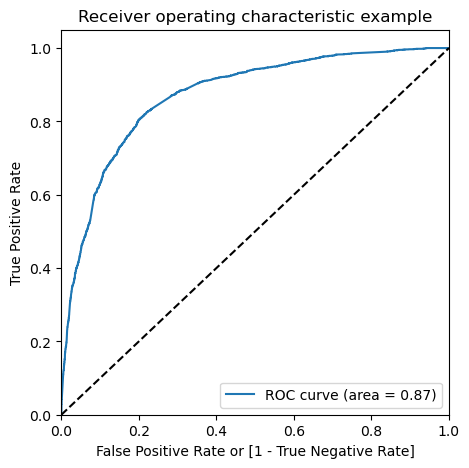

In [93]:
#Checking ROC curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [94]:
#The area under curve is good (almost equal to 1)
#I will now find the optimal cut-off (where both sensitivity and specificity are optimally high)

#Checking the prediction for different cut-offs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.204560,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.038004,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.230360,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.892370,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.693893,7987,1,1,1,1,1,1,1,1,0,0,0


In [95]:
#Calculating accuracy, sensitivity and specificity for various probability cut-offs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.578649  0.975470  0.330090
0.2   0.2  0.723980  0.917007  0.603073
0.3   0.3  0.794048  0.830335  0.771319
0.4   0.4  0.801606  0.767375  0.823047
0.5   0.5  0.802551  0.682339  0.877849
0.6   0.6  0.792789  0.606296  0.909603
0.7   0.7  0.760983  0.466476  0.945455
0.8   0.8  0.737364  0.372445  0.965941
0.9   0.9  0.682412  0.195830  0.987196


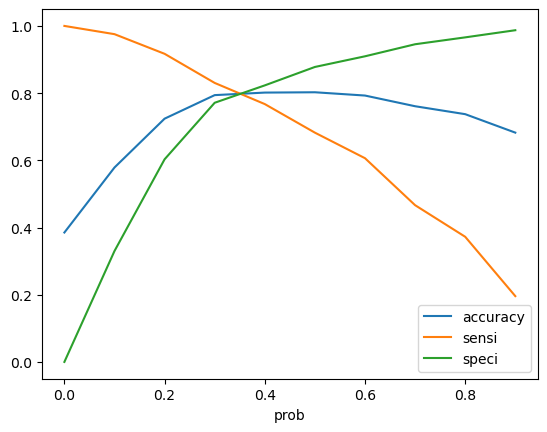

In [96]:
#Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### It seems 0.35 would be the appropriate cut-off which will ensure higher sensitivity and higher specificity and maintaining a good accuracy.

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.204560,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.038004,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.230360,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.892370,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.693893,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [102]:
#Checking the final confusion matrix, its accuracy and other parameters

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 
print(confusion2)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

[[3107  798]
 [ 470 1976]]
0.8003464021413951


In [103]:
#Sensitivity
TP / float(TP+FN)

0.8078495502861816

In [104]:
#So the sensitivity has improved from 68% to 81% !!

In [105]:
#Specificity
TN / float(TN+FP)

0.7956466069142125

In [106]:
#Specificity has got compromised a bit as compared to the model with cut-off 0.5.
#Still 80% specificity is quite good!!

#### The final model is ready. I am skipping Precision-Recall analysis as it's similar to Sensitivity-Specificity analysis. I am moving to making prediction on test set now.

### Step 5: Making predictions on test set

In [107]:
#Standardizing the numerical (continuous) features of test set using the transform of train (hence only transform and not fit.transform)
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [108]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [109]:
X_test.shape

(2723, 17)

In [110]:
#Making predictions on test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.173100
1490    0.727644
7936    0.149579
4216    0.866173
3830    0.136256
1800    0.150114
6507    0.447419
4821    0.318588
4223    0.973201
4714    0.230360
dtype: float64

In [111]:
#converting y_test_pred to dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
# Converting y_test to dataframe and adding 'CustID as index'
y_test_df = pd.DataFrame(y_test)
y_test_df['CustID'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.173100
1,1,1490,0.727644
2,0,7936,0.149579
3,1,4216,0.866173
4,0,3830,0.136256


In [114]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,0,3271,0.173100
1,1,1490,0.727644
2,0,7936,0.149579
3,1,4216,0.866173
4,0,3830,0.136256


In [115]:
#Assigning conversion prediction based on cut-off 0.35
y_pred_final['Converted_Pred'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,CustID,Converted_Prob,Converted_Pred
0,0,3271,0.173100,0
1,1,1490,0.727644,1
2,0,7936,0.149579,0
3,1,4216,0.866173,1
4,0,3830,0.136256,0


In [116]:
#Checking accuracy and other metrices
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Converted_Pred)

0.791039294895336

In [117]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Converted_Pred)
confusion3

array([[1382,  352],
       [ 217,  772]], dtype=int64)

In [119]:
TP = confusion3[1,1] 
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

In [120]:
#Sensitivity
TP / float(TP+FN)

0.7805864509605662

In [121]:
#Specificity
TN / float(TN+FP)

0.7970011534025375

#### So, in the test data as well, the built model is delivering 79% accuracy, 78% sensitivity and around 80% specificity !